# Here we are trying to predict whether a patient got re-infected by cancer or not(cancer reccurence) 

## About Dataset

### This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia.
Number of Instances: 286
Number of Attributes: 10
Attribute Information:

    class: no-recurrence-events, recurrence-events
    age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
    menopause: lt40, ge40, premeno.
    tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
    inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
    node-caps: yes, no.
    deg-malig: 1, 2, 3.
    breast: left, right.
    breast-quad: left-up, left-low, right-up, right-low, central.
    irradiate: yes, no.


In [36]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [35]:

# Replace 'path/to/your/breast-cancer-data.csv' with the actual full path to the file
df = pd.read_csv(r'C:\Users\eurls\Desktop\breast_cancer_data.csv')


# Display the first few rows of the DataFrame
df.head(10)


,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49',premeno',15-19',0-2',yes',3',right',left_up',no',recurrence-events'
1,50-59',ge40',15-19',0-2',no',1',right',central',no',no-recurrence-events'
2,50-59',ge40',35-39',0-2',no',2',left',left_low',no',recurrence-events'
3,40-49',premeno',35-39',0-2',yes',3',right',left_low',yes',no-recurrence-events'
4,40-49',premeno',30-34',3-5',yes',2',left',right_up',no',recurrence-events'
5,50-59',premeno',25-29',3-5',no',2',right',left_up',yes',no-recurrence-events'
6,50-59',ge40',40-44',0-2',no',3',left',left_up',no',no-recurrence-events'
7,40-49',premeno',10-14',0-2',no',2',left',left_up',no',no-recurrence-events'
8,40-49',premeno',0-4',0-2',no',2',right',right_low',no',no-recurrence-events'
9,40-49',ge40',40-44',15-17',yes',2',right',left_up',yes',no-recurrence-events'


In [2]:
df.shape

(286, 10)

In [3]:
data_types = df.dtypes
print(data_types)

age            object
menopause      object
tumer-size     object
inv-nodes      object
node-caps      object
deg-malig      object
breast         object
breast-quad    object
irradiate      object
class          object
dtype: object


## Data Cleaning

### We want to remove the string (') from all the data 

In [4]:
for column in df.columns:
    df[column] = df[column].str.replace("'", "")


In [5]:
df.head(5)

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


##  Searching for Missing value 

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiate      0
class          0
dtype: int64


In [7]:
# delete all the row  within missing values
df_clean = df.dropna()
# calcul the sum of missing value per column
missing_values = df_clean.isnull().sum()

print(missing_values)



age            0
menopause      0
tumer-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiate      0
class          0
dtype: int64


In [8]:
df_clean.shape

(277, 10)

## Exploratory Data Analysis 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


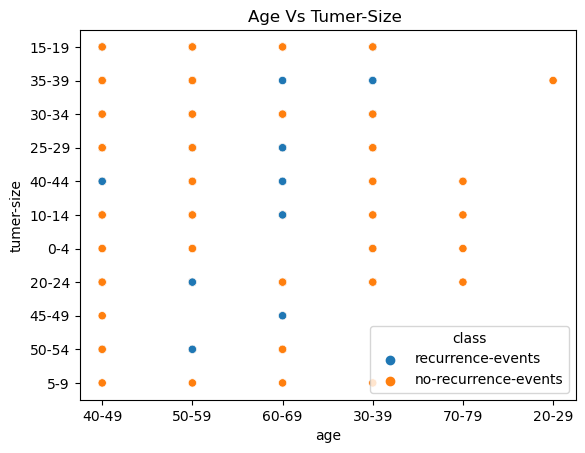

In [10]:

sns.scatterplot(df_clean,x='age',y='tumer-size',hue='class')
plt.title('Age Vs Tumer-Size ')
plt.show()

In [11]:
cross_tab = pd.crosstab(df_clean['age'], df_clean['tumer-size'])
print(cross_tab)

tumer-size  0-4  10-14  15-19  20-24  25-29  30-34  35-39  40-44  45-49  5-9  \
age                                                                            
20-29         0      0      0      0      0      0      1      0      0    0   
30-39         2      2      5      6      6      7      3      4      0    1   
40-49         2      8      5     21     17     20      7      5      1    1   
50-59         3      9     10     12     21     17      7      8      0    1   
60-69         0      8      9      8      7     13      1      3      2    1   
70-79         1      1      0      1      0      0      0      2      0    0   

tumer-size  50-54  
age                
20-29           0  
30-39           0  
40-49           2  
50-59           3  
60-69           3  
70-79           0  


### observations : we can see that cancer reccurence is seems to be  linked with tumer-size and age 

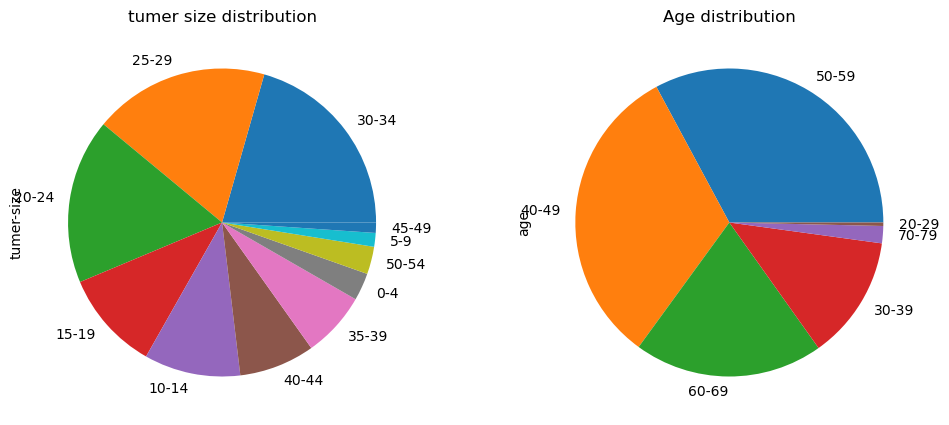

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

tumor_size_representation = df_clean['tumer-size'].value_counts()
tumor_size_representation.plot(kind='pie',ax=ax1)
ax1.set_title('tumer size distribution')


age_distribution = df_clean['age'].value_counts()
age_distribution.plot(kind='pie',ax=ax2)
ax2.set_title('Age distribution')

plt.show()

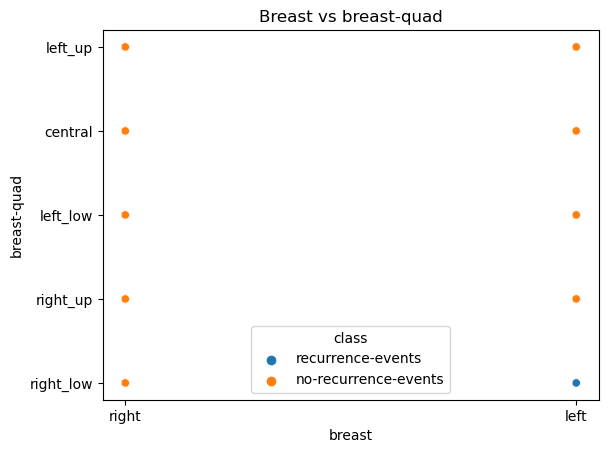

In [13]:
sns.scatterplot(df_clean,x='breast',y='breast-quad',hue='class')
plt.title('Breast vs breast-quad')
plt.show()

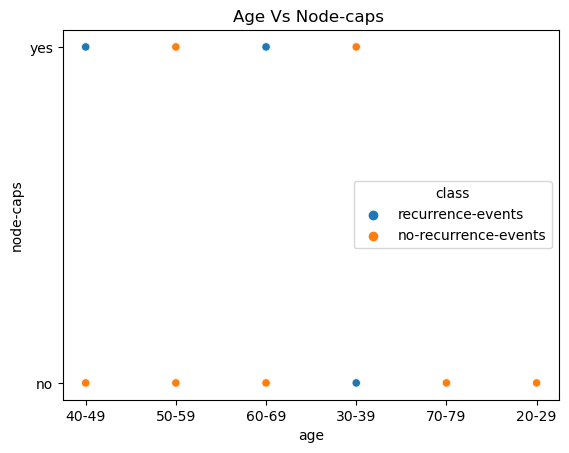

In [14]:
sns.scatterplot(df_clean,x='age',y='node-caps',hue='class')
plt.title('Age Vs Node-caps ')
plt.show()

In [15]:
frequency_node_caps = df_clean.groupby('node-caps')['class'].value_counts()
frequency_node_caps 


node-caps  class               
no         no-recurrence-events    171
           recurrence-events        50
yes        recurrence-events        31
           no-recurrence-events     25
Name: class, dtype: int64

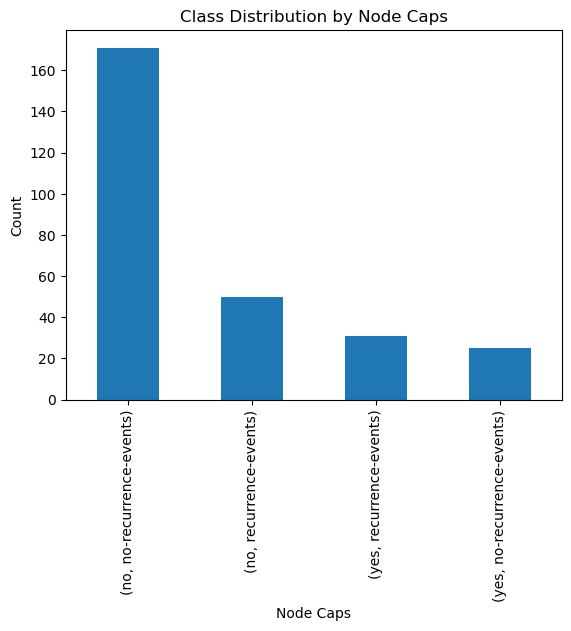

In [16]:
frequency_node_caps.plot(kind='bar', stacked=True)
plt.title('Class Distribution by Node Caps')
plt.xlabel('Node Caps')
plt.ylabel('Count')
plt.show()

In [17]:
frequency_node_caps2 = df_clean.groupby('inv-nodes')['class'].value_counts()
frequency_node_caps2 


inv-nodes  class               
0-2        no-recurrence-events    166
           recurrence-events        43
12-14      recurrence-events         2
           no-recurrence-events      1
15-17      no-recurrence-events      3
           recurrence-events         3
24-26      recurrence-events         1
3-5        no-recurrence-events     17
           recurrence-events        17
6-8        recurrence-events        10
           no-recurrence-events      7
9-11       recurrence-events         5
           no-recurrence-events      2
Name: class, dtype: int64

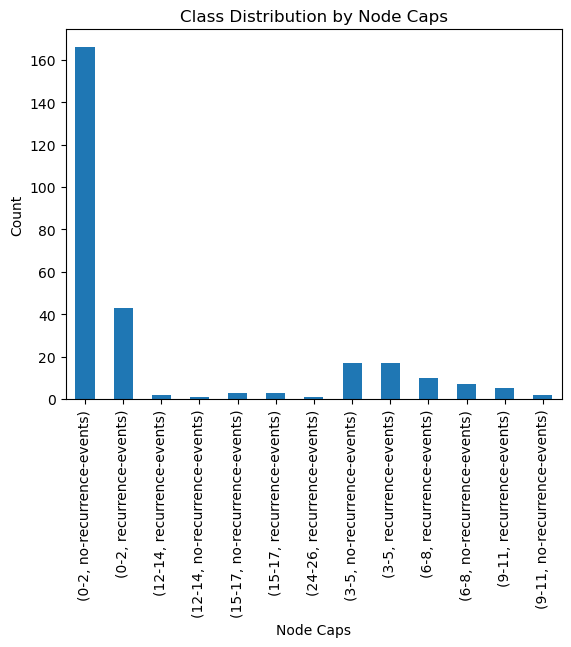

In [18]:
frequency_node_caps2.plot(kind='bar', stacked=True)
plt.title('Class Distribution by Node Caps')
plt.xlabel('Node Caps')
plt.ylabel('Count')
plt.show()

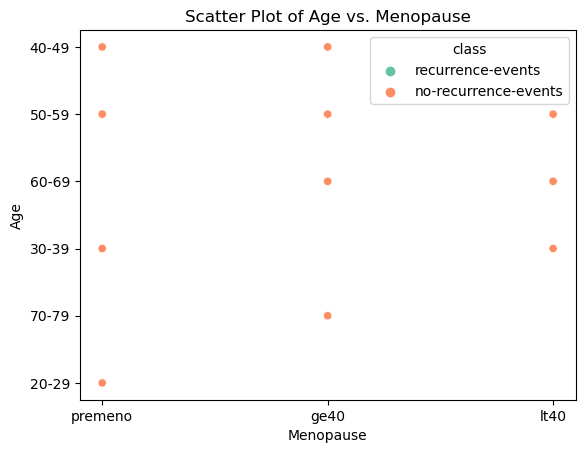

In [19]:
sns.set_palette("Set2")  # Set the color palette
ax = sns.scatterplot(data=df_clean, x='menopause', y='age', hue='class')
ax.set_title('Scatter Plot of Age vs. Menopause')
ax.set_xlabel('Menopause')
ax.set_ylabel('Age')
plt.show()

## Machine Learning 

We input numerical data to apply ML algorithm

In [20]:
df_clean_dummies = pd.get_dummies(df_clean, columns=['age', 'menopause', 'tumer-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiate','class'])


In [21]:
df_clean_dummies.dtypes

age_20-29                     uint8
age_30-39                     uint8
age_40-49                     uint8
age_50-59                     uint8
age_60-69                     uint8
age_70-79                     uint8
menopause_ge40                uint8
menopause_lt40                uint8
menopause_premeno             uint8
tumer-size_0-4                uint8
tumer-size_10-14              uint8
tumer-size_15-19              uint8
tumer-size_20-24              uint8
tumer-size_25-29              uint8
tumer-size_30-34              uint8
tumer-size_35-39              uint8
tumer-size_40-44              uint8
tumer-size_45-49              uint8
tumer-size_5-9                uint8
tumer-size_50-54              uint8
inv-nodes_0-2                 uint8
inv-nodes_12-14               uint8
inv-nodes_15-17               uint8
inv-nodes_24-26               uint8
inv-nodes_3-5                 uint8
inv-nodes_6-8                 uint8
inv-nodes_9-11                uint8
node-caps_no                

0      1
1      0
2      1
3      0
4      1
      ..
281    0
282    0
283    0
284    0
285    0
Name: class_recurrence-events, Length: 277, dtype: uint8

In [23]:


# define the features (x) and the target (y) 
X = df_clean_dummies.drop(columns=['class_recurrence-events','class_no-recurrence-events'])  # Features (X)
y = df_clean_dummies['class_recurrence-events']  # Target (y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic regression 

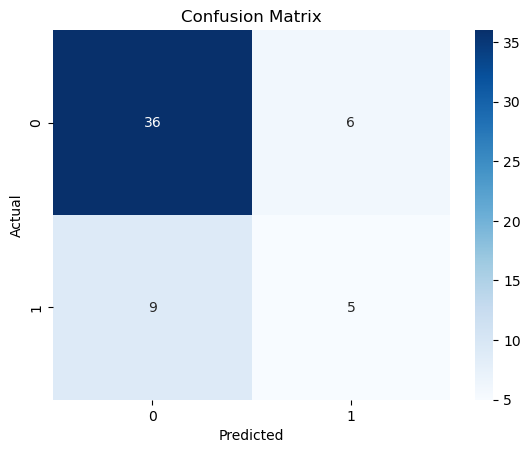

In [26]:
# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Decision tree

Decision Tree Accuracy: 0.77


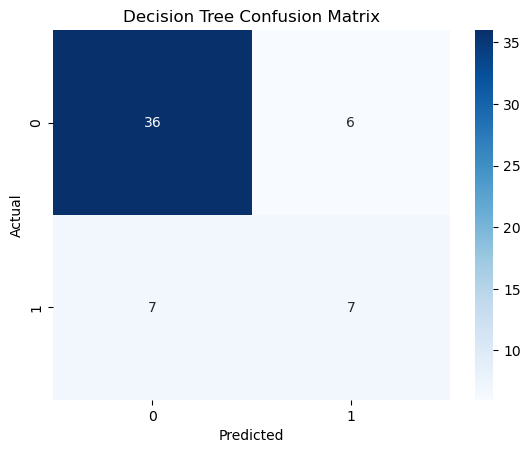

In [27]:

# Create a decision tree classifier
tree_model = DecisionTreeClassifier(random_state=30)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Predict on the test data
tree_y_pred = tree_model.predict(X_test)

# Calculate accuracy
tree_accuracy = accuracy_score(y_test, tree_y_pred)
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")

# Calculate the confusion matrix
tree_conf_matrix = confusion_matrix(y_test, tree_y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(tree_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## observaation : the accuracy on decision tree might be higher with less features , let's try it,to do it, we will encode the value instead of getting them dummies

In [28]:
from sklearn.preprocessing import LabelEncoder

# instanciar encoder
lb = LabelEncoder()

objList = df.select_dtypes(include = "object").columns

for obj in objList:
    df[obj] = lb.fit_transform(df[obj].astype(str))


In [29]:
df

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
0,2,2,2,0,2,2,1,2,0,1
1,3,0,2,0,1,0,1,0,0,0
2,3,0,6,0,1,1,0,1,0,1
3,2,2,6,0,2,2,1,1,1,0
4,2,2,5,4,2,1,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...
281,3,0,5,5,2,1,0,1,0,0
282,3,2,4,4,2,1,0,1,1,0
283,1,2,5,5,2,1,1,5,0,0
284,3,2,2,0,1,1,1,1,0,0


In [30]:
df.corr()

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
age,1.000000,-0.720322,-0.016053,-0.042916,-0.093049,-0.085968,-0.041769,-0.058773,-0.042080,-0.071719
menopause,-0.720322,1.000000,-0.003838,-0.021208,0.068029,-0.043490,0.058056,0.089860,0.041752,0.052498
tumer-size,-0.016053,-0.003838,1.000000,0.149747,0.158226,0.163765,0.031215,0.142238,0.159568,0.130573
inv-nodes,-0.042916,-0.021208,0.149747,1.000000,0.488907,0.282365,0.022345,0.010469,0.382650,0.292088
node-caps,-0.093049,0.068029,0.158226,0.488907,1.000000,0.328815,0.023930,0.069868,0.196613,0.237577
deg-malig,-0.085968,-0.043490,0.163765,0.282365,0.328815,1.000000,-0.052861,0.033740,0.208099,0.299400
breast,-0.041769,0.058056,0.031215,0.022345,0.023930,-0.052861,1.000000,0.175316,0.018761,-0.058646
breast-quad,-0.058773,0.089860,0.142238,0.010469,0.069868,0.033740,0.175316,1.000000,0.005448,0.054366
irradiate,-0.042080,0.041752,0.159568,0.382650,0.196613,0.208099,0.018761,0.005448,1.000000,0.193912
class,-0.071719,0.052498,0.130573,0.292088,0.237577,0.299400,-0.058646,0.054366,0.193912,1.000000


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x= df.drop(columns='class')
y=df['class']
x_train2,x_test2,y_train2,y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)


In [32]:
model = DecisionTreeClassifier(max_depth= 2  ,random_state = 42)

In [33]:
model.fit(x_train2,y_train2)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [34]:
y_pred = model.predict(x_test2)
model_accuracy = accuracy_score(y_test2, y_pred)
print(f"Decision Tree Accuracy: {model_accuracy:.2f}")


Decision Tree Accuracy: 0.76


## the accuraacy is not better , we can still search the best paramaters but we don't have enough data ,the earn margin will not be as significant as we would 